<a href="https://colab.research.google.com/github/kgudalewski/grailed_sales_analysis/blob/main/Grailed_data_initial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [920]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [921]:
df_main = pd.read_csv("https://raw.githubusercontent.com/kgudalewski/grailed_sales_analysis/main/grailed_analysis_df.csv",encoding="utf-16").drop(columns="Unnamed: 0")
df_main.head()

,title,link,size,condition,color,seller_name,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,BMW racing rare archive bomber 90s,https://www.grailed.com/listings/33705557-bmw-...,Men's / US XS / EU 42 / 0,Used,Black,Humanraceeei,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Mens Bomber Jacket Racing BMW F1 Size XL,https://www.grailed.com/listings/32948063-bmw-...,Men's / US XL / EU 56 / 4,Used,Blue,Casual_VntShop,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,BMW E36 Jacket,https://www.grailed.com/listings/42982572-bmw-...,Men's / US M / EU 48-50 / 2,Gently Used,Blue,beaubier32,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Vintage BMW Racing Jacket Williams F1 Team Hoo...,https://www.grailed.com/listings/42929894-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Blue white,DealHand,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,y2k BMW Zip up Jacket,https://www.grailed.com/listings/42583439-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Black,hightailvinta5695,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


In [922]:
pd.DataFrame(df_main.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120]).rename(columns={"sold_price":"sold_price_mean"})

,sold_price_mean
seller_name,
kaithompsen,2580.000000
TheJacketKing,1100.000000
Sincewhenwasthat,840.000000
eddie808,828.000000
eggcafe_,808.000000
...,...
onseam,275.000000
Vadic,275.000000
KCsupremesales,275.000000


In [923]:
print("I'm in",round((120 / 2744)*100, 2),"% most expensive selling sellers")

I'm in 4.37 % most expensive selling sellers


In [924]:
# list_of_sellers_with_higher_mean = df.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120].index.to_list()

In [925]:
# pd.DataFrame(df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False)).rename(columns = {"seller_name":"number_of_sales"})

In [926]:
# df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False).value_counts()

In [927]:
# print("While most of sellers with higher average sold price have only 1 item sold")

In [928]:
pd.DataFrame(df_main.seller_name.loc[df_main.price.isna()].value_counts()).rename(columns={"seller_name":"number_of_sales"})

,number_of_sales
WinampVintage,245
Merchandise_Vtg,195
VintageRacingStuff,149
newy_store,52
ClochardDeluxe,48
...,...
luciagonzo0,1
NataZuza,1
NO_INTRODUCTIONS,1
hypepriestx,1


In [929]:
print("And simultaneously in top 3 most often selling sellers")

And simultaneously in top 3 most often selling sellers


In [930]:
pd.DataFrame(df_main.groupby(by="seller_name").sold_price.sum().sort_values(ascending=False)).rename(columns={"sold_price":"total_revenue"})

,total_revenue
seller_name,
VintageRacingStuff,40752.0
WinampVintage,26282.0
Merchandise_Vtg,19736.0
ClochardDeluxe,7976.0
newy_store,7458.0
...,...
SoivStore,0.0
Solo_Store,0.0
Somich,0.0


In [931]:
print("This makes me seller with the highest revenue, which cames from selling racing jackets")

This makes me seller with the highest revenue, which cames from selling racing jackets


#Data pre processing


In [932]:
df = df_main.drop(columns=["title","link","seller_name",])
df.head()

,size,condition,color,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,Men's / US XS / EU 42 / 0,Used,Black,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Men's / US XL / EU 56 / 4,Used,Blue,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,Men's / US M / EU 48-50 / 2,Gently Used,Blue,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Men's / US XL / EU 56 / 4,Gently Used,Blue white,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,Men's / US XL / EU 56 / 4,Gently Used,Black,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


# size issue

In [933]:
df["size"] = df["size"].str.split("/").apply(lambda x:x[1].split(" ")).apply(lambda x:x[2].strip())

In [934]:
df = df.astype({"size":"category"})
df.dtypes

size              category
condition           object
color               object
designers           object
description         object
num_of_photos      float64
num_of_tags        float64
measurements       float64
location            object
shipping_price     float64
price              float64
sold_price         float64
dtype: object

In [935]:
df_size_count = pd.DataFrame(df["size"].value_counts()).reindex(["XXS","XS","S","M","L","XL","XXL"])
df_size_count

,size
XXS,58
XS,143
S,1187
M,3909
L,5745
XL,3562
XXL,905


Text(0.5, 1.0, "Number of items' sizes")

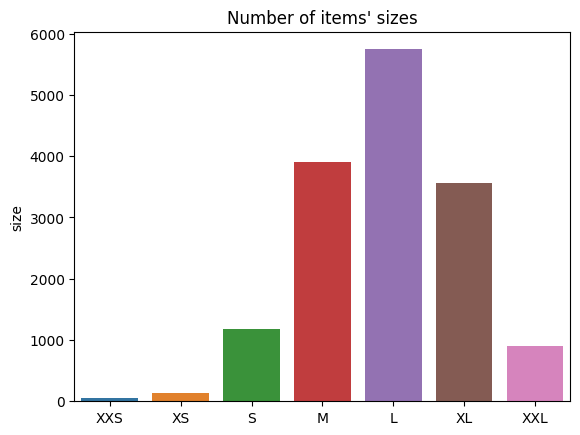

In [936]:
sns.barplot(data = df_size_count,x=df_size_count.index,y="size")
plt.title("Number of items' sizes")

In [937]:
df.head()

,size,condition,color,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,XS,Used,Black,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,XL,Used,Blue,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,M,Gently Used,Blue,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,XL,Gently Used,Blue white,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,XL,Gently Used,Black,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


# condition issue

In [938]:
df.condition.value_counts()

Gently Used    7521
Used           7170
New             574
Worn            244
Name: condition, dtype: int64

In [939]:
df = df.astype({"condition":"category"})
df.dtypes

size              category
condition         category
color               object
designers           object
description         object
num_of_photos      float64
num_of_tags        float64
measurements       float64
location            object
shipping_price     float64
price              float64
sold_price         float64
dtype: object

In [940]:
df_condition_count = pd.DataFrame(df["condition"].value_counts()).reindex(["Worn","Used","Gently Used","New"])
df_condition_count

,condition
Worn,244
Used,7170
Gently Used,7521
New,574


Text(0.5, 1.0, "Number of items' conditions")

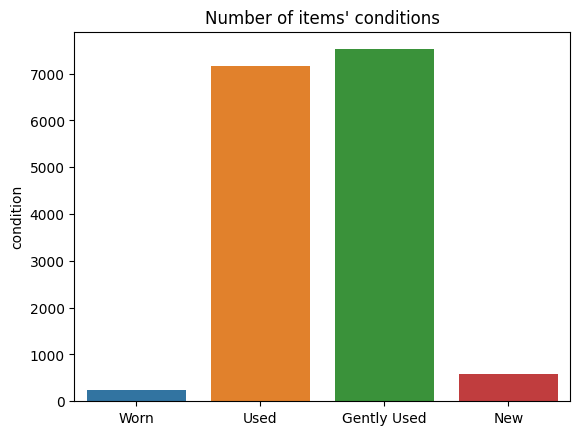

In [941]:
sns.barplot(x=df_condition_count.index,y=df_condition_count.condition)
plt.title("Number of items' conditions")

In [1004]:
df.groupby(by="condition").price.mean()

condition
Gently Used    145.609948
New            130.358974
Used           155.427471
Worn           140.343558
Name: price, dtype: float64

In [1005]:
df.groupby(by="condition").sold_price.mean()

condition
Gently Used    121.735207
New            140.544118
Used           117.288252
Worn           102.246914
Name: sold_price, dtype: float64

# color issue

In [942]:
df.color = df.color.str.lower().str.strip()
df.color = df.color.str.split("/").apply(lambda x:[color.strip() for color in x])
df.color = df.color.apply(lambda x:[color.split(" ") for color in x])
df.color = df.color.apply(lambda x:[color[0] for color in x])
df.color = df.color.apply(lambda x:[color.split('\\') for color in x])
df.color = df.color.apply(lambda x:[color[0] for color in x])
list_of_errors = ["multi","mix","multiple","multicolour","rainbow","mutli","colorful",'multi-color',"multicolored"]
df.color = df.color.apply(lambda x:["multicolor" if color in list_of_errors else color for color in x])
df.color = df.color.apply(lambda x:["grey" if color=="gray" else color for color in x])

In [943]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_mlb_colors = pd.DataFrame(mlb.fit_transform(df.color),columns=mlb.classes_)
df_mlb_colors = df_mlb_colors.loc[:,["black","red","blue","white","multicolor","navy","brown","grey","green","yellow","orange","purple"]]

df_mlb_colors["other"] = [0 if sum != 0 else 1 for sum in df_mlb_colors.sum(axis=1)]

colors = ["color_"+name for name in df_mlb_colors.columns]
df_mlb_colors.columns = colors

df = pd.concat([df,df_mlb_colors],axis=1).drop(columns=["color"])

In [944]:
df_colors_count = pd.DataFrame(df.loc[:,colors].sum())
df_colors_count

,0
color_black,5378
color_red,3731
color_blue,2048
color_white,1169
color_multicolor,879
color_navy,477
color_brown,349
color_grey,496
color_green,350
color_yellow,390


Text(0.5, 1.0, "Number of items' colors")

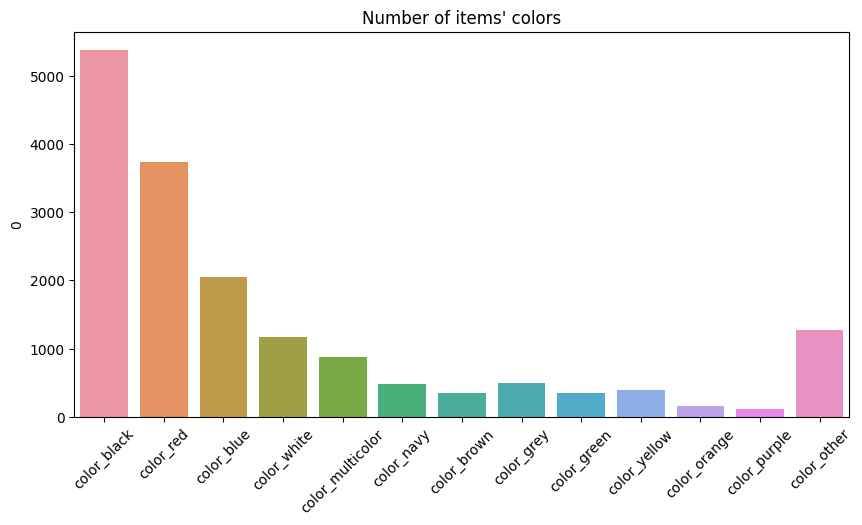

In [945]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_colors_count.index,y=df_colors_count.iloc[:,0])
plt.xticks(rotation=45)
plt.title("Number of items' colors")

In [946]:
df.head()

,size,condition,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,...,color_white,color_multicolor,color_navy,color_brown,color_grey,color_green,color_yellow,color_orange,color_purple,color_other
0,XS,Used,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,...,0,0,0,0,0,0,0,0,0,0
1,XL,Used,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,...,0,0,0,0,0,0,0,0,0,0
2,M,Gently Used,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,...,0,0,0,0,0,0,0,0,0,0
3,XL,Gently Used,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,...,0,0,0,0,0,0,0,0,0,0
4,XL,Gently Used,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,...,0,0,0,0,0,0,0,0,0,0


# designers issue

In [947]:
df.designers = df.designers.str.replace(" ","").str.split("×")

In [948]:
mlb = MultiLabelBinarizer()
mlb_designers_df = pd.DataFrame(mlb.fit_transform(df.designers),columns=mlb.classes_)
list_of_top_brands = list(mlb_designers_df.sum().sort_values(ascending=False)[:18].index)
mlb_designers_df = mlb_designers_df.loc[:,list_of_top_brands]
columns_names = ["designer_"+name for name in list_of_top_brands]
mlb_designers_df.columns = columns_names

In [949]:
df_designer_count = pd.DataFrame(mlb_designers_df.sum())
df_designer_count

,0
designer_Vintage,9626
designer_Racing,7313
designer_NASCAR,3420
designer_Honda,2391
designer_Marlboro,2173
designer_Ferrari,2061
designer_MOTO,1969
designer_FormulaUno,1338
designer_Streetwear,1105
designer_MercedesBenz,1021


Text(0.5, 1.0, 'Number of items by designers')

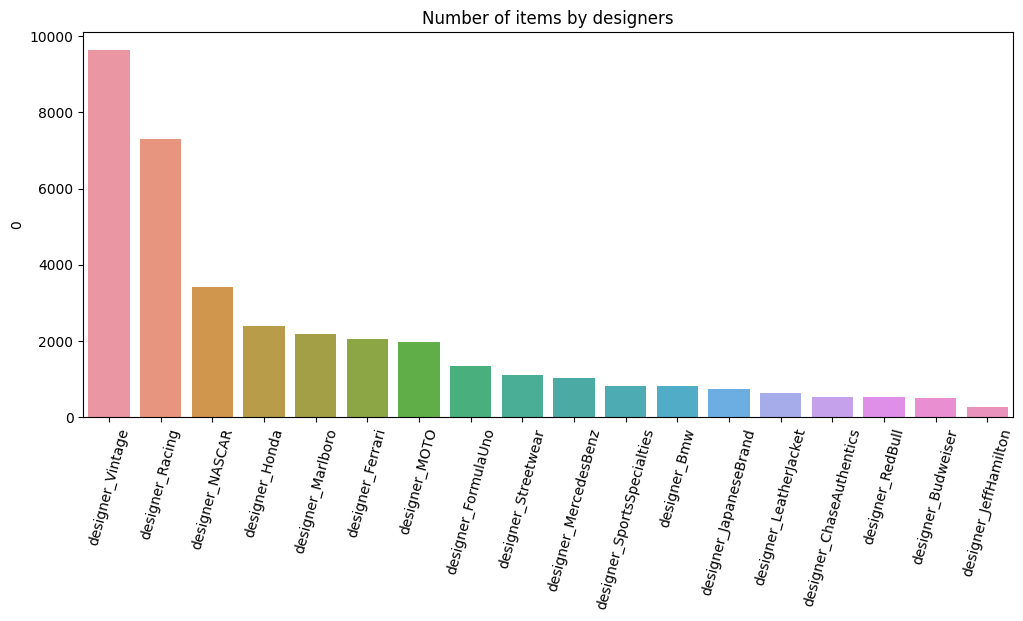

In [950]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_designer_count.index,y=df_designer_count.iloc[:,0])
plt.xticks(rotation=75)
plt.title("Number of items by designers")

In [951]:
df = pd.concat([df,mlb_designers_df],axis=1).drop(columns=["designers"])

In [952]:
list_of_average_price = []
for designer in columns_names:
  list_of_average_price.append(df.groupby(by=designer).sold_price.mean()[1])
df_designer_avg_price = pd.DataFrame(list_of_average_price, index=columns_names)
df_designer_avg_price

,0
designer_Vintage,118.258183
designer_Racing,140.566913
designer_NASCAR,105.510010
designer_Honda,130.800613
designer_Marlboro,108.213821
designer_Ferrari,146.524378
designer_MOTO,132.264310
designer_FormulaUno,148.095238
designer_Streetwear,86.067029
designer_MercedesBenz,139.190987


Text(0.5, 1.0, 'Average price of items by designers')

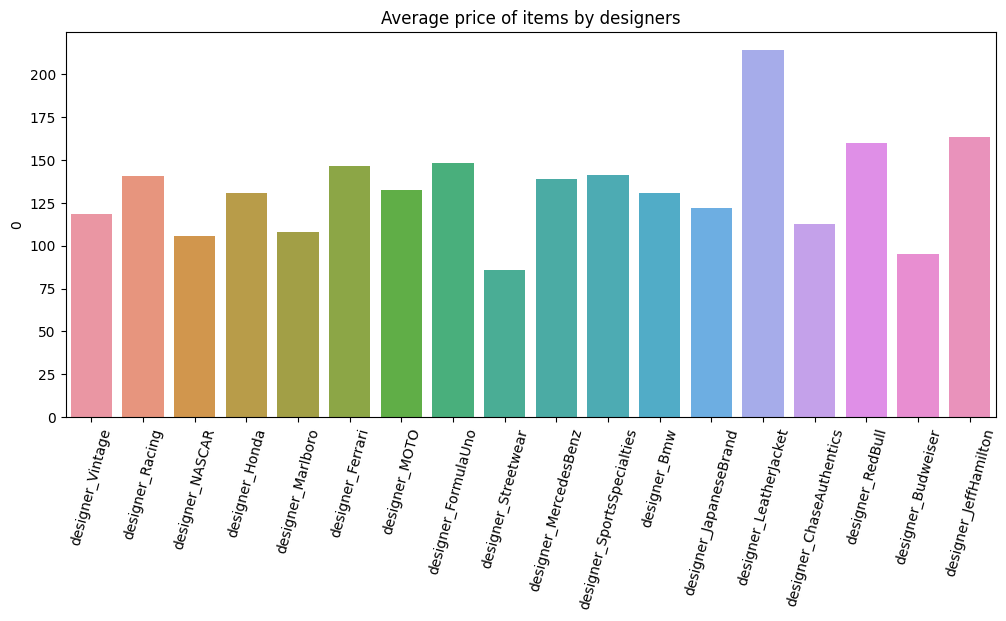

In [953]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_designer_avg_price.index,y=df_designer_avg_price.iloc[:,0])
plt.xticks(rotation=75)
plt.title("Average price of items by designers")

# description issue

Has the length of descrition got impact on the item's price ? 

In [954]:
df.description = df.description.apply(lambda x:len(x))

In [955]:
df_desc_len_sold_price = df.loc[df.price.isna()].loc[:,["description","sold_price"]].sort_values(by="sold_price")
df_desc_len_sold_price
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_df = pd.DataFrame(std.fit_transform(df_desc_len_sold_price),columns=["description","sold_price"])
scaled_df.sold_price = scaled_df.loc[scaled_df.sold_price < 4].sold_price
scaled_df.description = scaled_df.loc[scaled_df.description < 4].description

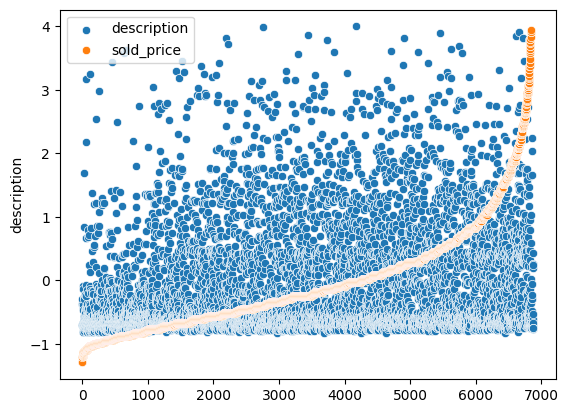

In [956]:
sns.scatterplot(x = scaled_df.index,y= scaled_df.description,label="description")
sns.scatterplot(x = scaled_df.index,y= scaled_df.sold_price,label="sold_price")
plt.legend()

In [957]:
df_desc_len_sold_price.corr("spearman")

,description,sold_price
description,1.000000,0.217712
sold_price,0.217712,1.000000


In [958]:
df_desc_len_sold_price.corr()

,description,sold_price
description,1.000000,0.117796
sold_price,0.117796,1.000000


The answer is that there is no correlation between length of description and sold price. Length of description doesn't impact sold price

In [959]:
df = df.drop(columns=["description"])

# measurements issue

In [960]:
pd.DataFrame(df.groupby(by="measurements").price.mean()).rename(columns = {"price" : "average price of current items"})

,average price of current items
measurements,
0.0,139.690656
1.0,164.929015


In [961]:
pd.DataFrame(df.groupby(by="measurements").sold_price.mean()).rename(columns = {"sold_price" : "average price of sold items"})

,average price of sold items
measurements,
0.0,108.699346
1.0,128.444285


# num_of_tags issue

Is the number of tags really matter ? 

In [962]:
num_of_tags_df = pd.DataFrame(df.groupby(by="num_of_tags").price.mean()).rename(columns = {"price": "average price"})
num_of_tags_df

,average price
num_of_tags,
0.0,155.031769
1.0,153.476190
2.0,127.776316
3.0,139.993127
4.0,149.880779
5.0,157.729310
6.0,166.854054
7.0,156.582809
8.0,153.335175


<Axes: xlabel='num_of_tags', ylabel='average price'>

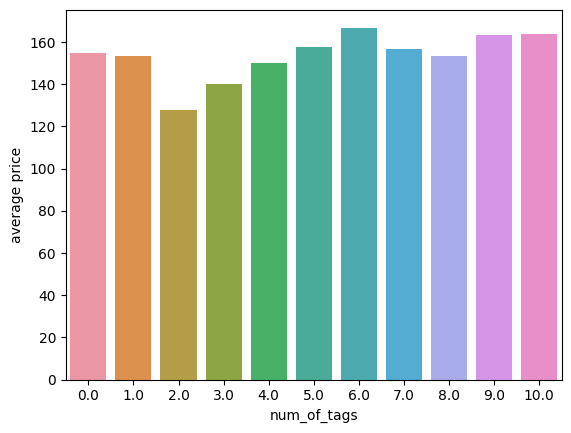

In [963]:
sns.barplot(data=num_of_tags_df, x = num_of_tags_df.index, y = "average price")

In [964]:
num_of_tags_sold_df = pd.DataFrame(df.groupby(by="num_of_tags").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
num_of_tags_sold_df

,average sold price
num_of_tags,
0.0,111.485641
1.0,109.305556
2.0,107.022727
3.0,111.094017
4.0,109.181319
5.0,123.964286
6.0,135.858065
7.0,130.910959
8.0,135.923304


<Axes: xlabel='num_of_tags', ylabel='average sold price'>

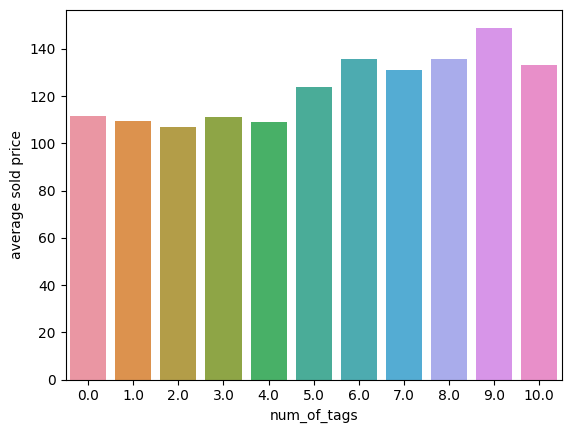

In [965]:
sns.barplot(data=num_of_tags_sold_df, x = num_of_tags_sold_df.index, y = "average sold price")

Number of tags matters. Charts show the difference between average price of sold listings with number of tags 0 and 1 and current listings with the same number of tags. Lower average price of item is when listing has less than two tags, so better is add tags to listing.

# num_of_photo issue

Is the number of photos matter ? 

In [966]:
df.num_of_photos = df.loc[df.num_of_photos > 0].num_of_photos
df.num_of_photos.value_counts()
#TODO have to delete rows with zero photo

8.0     1441
4.0     1424
9.0     1376
7.0     1366
6.0     1283
5.0     1264
10.0    1191
11.0     940
12.0     863
3.0      689
13.0     641
14.0     527
15.0     418
16.0     337
17.0     293
18.0     211
2.0      209
25.0     192
19.0     192
20.0     167
21.0     131
22.0     124
23.0     103
24.0      99
Name: num_of_photos, dtype: int64

In [967]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").price.mean()).rename(columns = {"price": "average price"})
y1 = num_of_photos_df.iloc[:,0]
num_of_photos_df

,average price
num_of_photos,
2.0,117.386792
3.0,101.031915
4.0,122.574961
5.0,136.625990
6.0,146.246246
7.0,149.763984
8.0,153.195545
9.0,159.726933
10.0,166.228532


In [968]:
num_of_photos_df.reset_index().corr()

,num_of_photos,average price
num_of_photos,1.000000,0.922115
average price,0.922115,1.000000


In [969]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
y2 = num_of_photos_df.iloc[:,0]
num_of_photos_df

,average sold price
num_of_photos,
2.0,92.310680
3.0,85.987715
4.0,97.631918
5.0,101.857820
6.0,109.058347
7.0,123.684044
8.0,128.018957
9.0,133.491289
10.0,132.893390


In [970]:
num_of_photos_df.reset_index().corr()

,num_of_photos,average sold price
num_of_photos,1.000000,0.793901
average sold price,0.793901,1.000000


Text(0.5, 1.0, 'Average price of listings per num_of_photos')

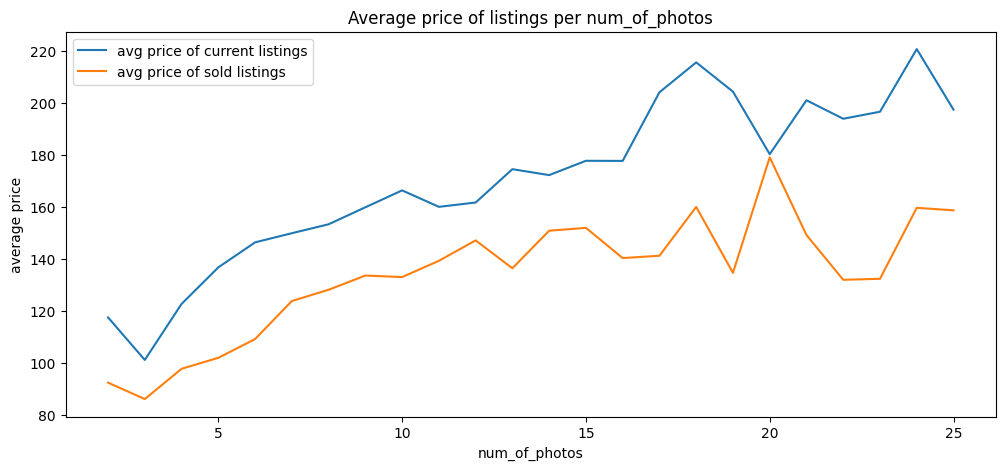

In [971]:
plt.figure(figsize = [12,5])
sns.lineplot(data=num_of_photos_df, x = num_of_photos_df.index, y = y1,label="avg price of current listings")
sns.lineplot(data=num_of_photos_df, x = num_of_photos_df.index, y = y2,label="avg price of sold listings")
plt.legend()
plt.title("Average price of listings per num_of_photos")

Number of photos has matter, there's a strong correlation between number of photos and price of item

# location issue

In [972]:
pd.DataFrame(df.groupby(by="location").shipping_price.mean()).rename(columns = {"shipping_price" : "average price of shipping"})

,average price of shipping
location,
AU,23.215000
Asia,26.389010
Canada,30.240000
Europe,20.038427
Other,22.114398
UK,26.398000
US,28.558907


In [973]:
pd.DataFrame(df.groupby(by="location").price.mean()).rename(columns = {"price" : "average price of current item"})

,average price of current item
location,
AU,162.333333
Asia,197.582003
Canada,125.943262
Europe,146.663504
Other,201.402367
UK,149.375000
US,113.727965


Text(0.5, 1.0, 'Number of current listings per region')

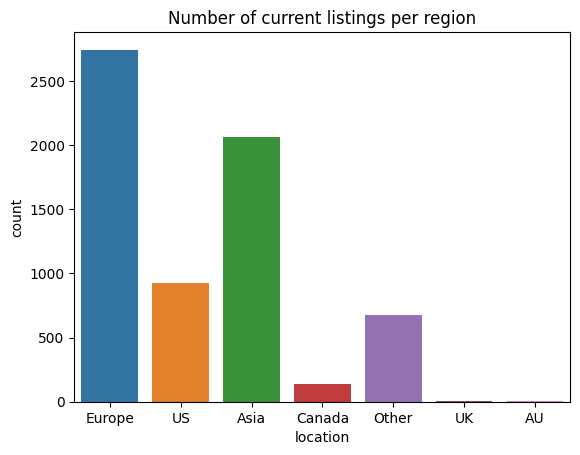

In [974]:
sns.countplot(data=df,x="location")
plt.title("Number of current listings per region")

In [999]:
df.location = df.location.astype("category")
df.dtypes

size                          category
condition                     category
num_of_photos                  float64
num_of_tags                    float64
measurements                   float64
location                      category
shipping_price                 float64
price                          float64
sold_price                     float64
color_black                      int64
color_red                        int64
color_blue                       int64
color_white                      int64
color_multicolor                 int64
color_navy                       int64
color_brown                      int64
color_grey                       int64
color_green                      int64
color_yellow                     int64
color_orange                     int64
color_purple                     int64
color_other                      int64
designer_Vintage                 int64
designer_Racing                  int64
designer_NASCAR                  int64
designer_Honda           

# shipping price issue


<Axes: xlabel='shipping_price', ylabel='Count'>

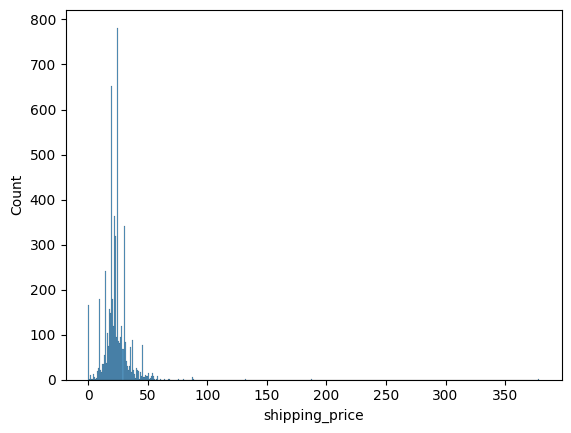

In [975]:
sns.histplot(data = df, x="shipping_price")
#TODO delete outliers

In [976]:
new_df = pd.DataFrame({'shipping_price': [60 if price > 60 else price for price in df.shipping_price]})
df.update(new_df)

In [977]:
new_df = pd.DataFrame({'shipping_price': [10 if price < 10 else price for price in df.shipping_price]})
df.update(new_df)

<Axes: xlabel='shipping_price', ylabel='Count'>

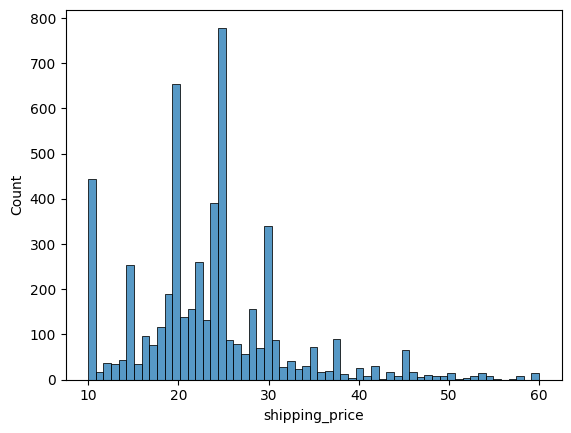

In [978]:
sns.histplot(data = df.loc[df.shipping_price<80], x="shipping_price")

In [979]:
df.shipping_price.isna().value_counts()

True     10159
False     5350
Name: shipping_price, dtype: int64

In [980]:
mean_shipping_price = df.shipping_price.mean()
df.shipping_price = df.shipping_price.fillna(mean_shipping_price)

In [981]:
df.shipping_price.isna().value_counts()

False    15509
Name: shipping_price, dtype: int64

In [982]:
df.head()

,size,condition,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price,color_black,...,designer_Streetwear,designer_MercedesBenz,designer_SportsSpecialties,designer_Bmw,designer_JapaneseBrand,designer_LeatherJacket,designer_ChaseAuthentics,designer_RedBull,designer_Budweiser,designer_JeffHamilton
0,XS,Used,2.0,0.0,0.0,Europe,10.000000,28.0,NaN,1,...,0,0,0,1,0,0,0,0,0,0
1,XL,Used,9.0,0.0,1.0,Europe,21.430000,45.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
2,M,Gently Used,5.0,0.0,0.0,US,23.614011,35.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
3,XL,Gently Used,16.0,10.0,1.0,Europe,23.614011,50.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
4,XL,Gently Used,7.0,0.0,1.0,US,21.430000,45.0,NaN,1,...,1,0,0,1,0,0,0,0,0,0


# price issue

In [983]:
#TODO have to delete outliers

<Axes: xlabel='price', ylabel='Count'>

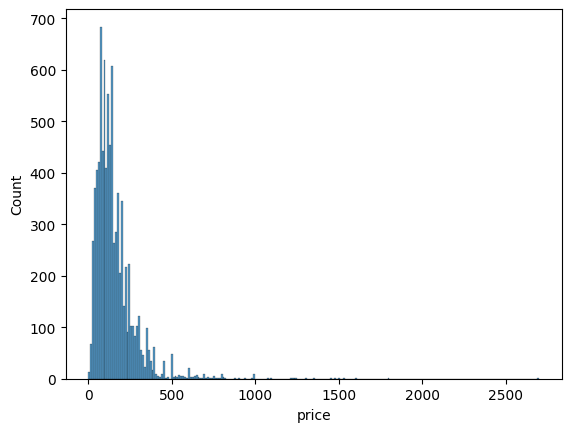

In [984]:
sns.histplot(df.price)

<Axes: xlabel='price', ylabel='Count'>

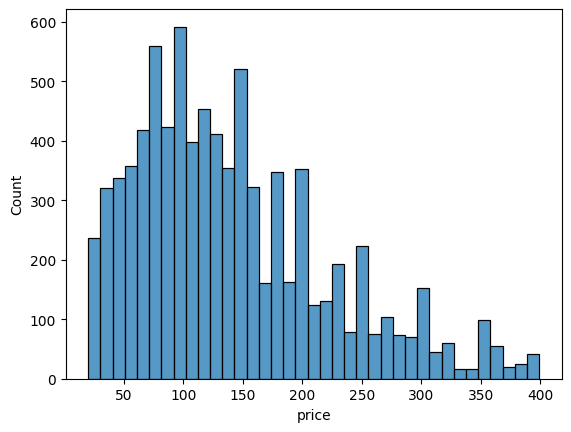

In [987]:
sns.histplot(df.loc[df.price < 400].price)

In [988]:
new_df = pd.DataFrame({'price': [400 if price > 400 else price for price in df.price]})
df.update(new_df)
new_df = pd.DataFrame({'price': [20 if price < 20 else price for price in df.price]})
df.update(new_df)

<Axes: xlabel='price', ylabel='Count'>

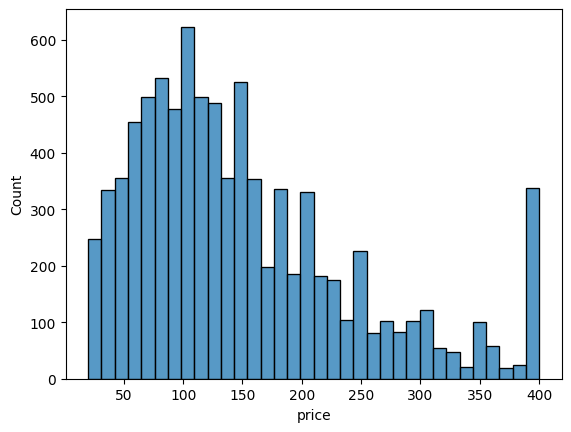

In [989]:
sns.histplot(df.price)

<Axes: xlabel='sold_price', ylabel='Count'>

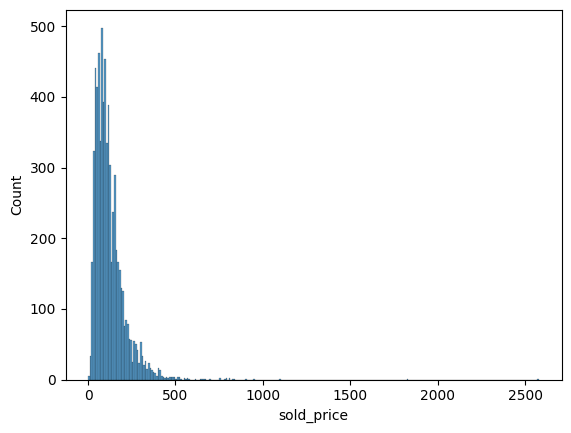

In [990]:
sns.histplot(df.sold_price)

<Axes: xlabel='sold_price', ylabel='Count'>

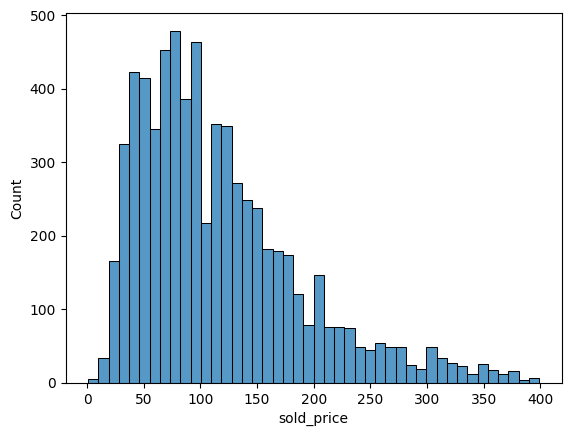

In [992]:
sns.histplot(df.loc[df.sold_price < 400].sold_price)

In [993]:
new_df = pd.DataFrame({'sold_price': [400 if price > 400 else price for price in df.sold_price]})
df.update(new_df)
new_df = pd.DataFrame({'sold_price': [20 if price < 20 else price for price in df.sold_price]})
df.update(new_df)

<Axes: xlabel='sold_price', ylabel='Count'>

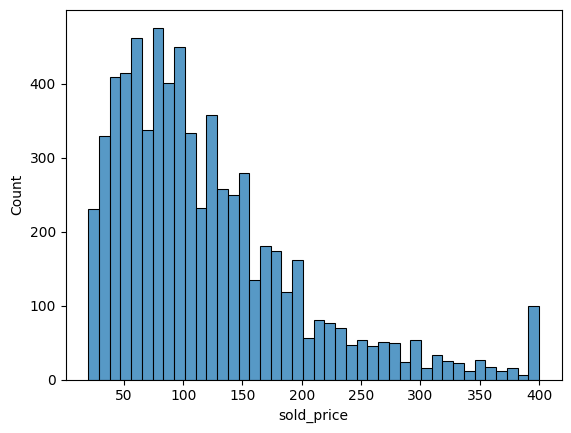

In [994]:
sns.histplot(df.sold_price)

In [995]:
df.head()

,size,condition,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price,color_black,...,designer_Streetwear,designer_MercedesBenz,designer_SportsSpecialties,designer_Bmw,designer_JapaneseBrand,designer_LeatherJacket,designer_ChaseAuthentics,designer_RedBull,designer_Budweiser,designer_JeffHamilton
0,XS,Used,2.0,0.0,0.0,Europe,10.000000,28.0,NaN,1,...,0,0,0,1,0,0,0,0,0,0
1,XL,Used,9.0,0.0,1.0,Europe,21.430000,45.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
2,M,Gently Used,5.0,0.0,0.0,US,23.614011,35.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
3,XL,Gently Used,16.0,10.0,1.0,Europe,23.614011,50.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
4,XL,Gently Used,7.0,0.0,1.0,US,21.430000,45.0,NaN,1,...,1,0,0,1,0,0,0,0,0,0


# save to file

In [1000]:
df.head()

,size,condition,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price,color_black,...,designer_Streetwear,designer_MercedesBenz,designer_SportsSpecialties,designer_Bmw,designer_JapaneseBrand,designer_LeatherJacket,designer_ChaseAuthentics,designer_RedBull,designer_Budweiser,designer_JeffHamilton
0,XS,Used,2.0,0.0,0.0,Europe,10.000000,28.0,NaN,1,...,0,0,0,1,0,0,0,0,0,0
1,XL,Used,9.0,0.0,1.0,Europe,21.430000,45.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
2,M,Gently Used,5.0,0.0,0.0,US,23.614011,35.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
3,XL,Gently Used,16.0,10.0,1.0,Europe,23.614011,50.0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
4,XL,Gently Used,7.0,0.0,1.0,US,21.430000,45.0,NaN,1,...,1,0,0,1,0,0,0,0,0,0


In [1002]:
df.columns

Index(['size', 'condition', 'num_of_photos', 'num_of_tags', 'measurements',
       'location', 'shipping_price', 'price', 'sold_price', 'color_black',
       'color_red', 'color_blue', 'color_white', 'color_multicolor',
       'color_navy', 'color_brown', 'color_grey', 'color_green',
       'color_yellow', 'color_orange', 'color_purple', 'color_other',
       'designer_Vintage', 'designer_Racing', 'designer_NASCAR',
       'designer_Honda', 'designer_Marlboro', 'designer_Ferrari',
       'designer_MOTO', 'designer_FormulaUno', 'designer_Streetwear',
       'designer_MercedesBenz', 'designer_SportsSpecialties', 'designer_Bmw',
       'designer_JapaneseBrand', 'designer_LeatherJacket',
       'designer_ChaseAuthentics', 'designer_RedBull', 'designer_Budweiser',
       'designer_JeffHamilton'],
      dtype='object')

In [1006]:
df.to_csv("grailed_data_ML.csv",encoding="utf-16")